In [2]:
from utils_v1 import *
import pathlib
import cv2
import sys
import numpy as np
from icecream import ic
from src.dataset import PA, PADeforestationTime, PAMultipleDates


In [3]:

# dataset = PADeforestationTime()
addPastDeforestationInput = True
dataset = PAMultipleDates(addPastDeforestationInput)


In [4]:
label_mask = dataset.loadLabel()
ic(label_mask.shape)

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


Label where deforestation past years is actual date (2018) = 1


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


Past deforestation different from 0 (no deforestation)


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| label_mask.shape: (17730, 9203, 2)


(17730, 9203, 2)

TypeError: Invalid shape (17730, 9203, 2) for image data

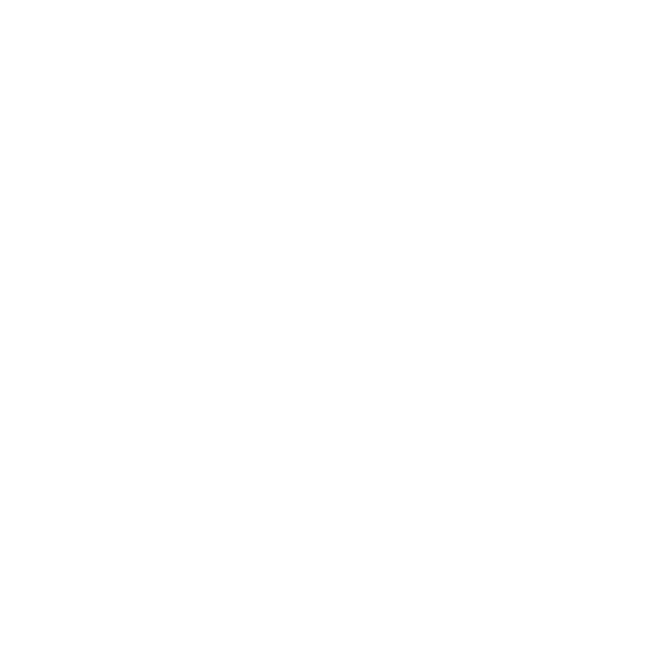

In [4]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(label_mask, cmap=plt.cm.gray)
plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_LabelMask.png',
        dpi = 150, bbox_inches = 'tight')
        

In [5]:
image_stack = dataset.loadInputImage()

ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlyi

2


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


In [6]:

'''
if type(dataset) == PADeforestationTime:
        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(image_stack[...,0].astype(np.int8), cmap = plt.cm.gray)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_pastDeforestation.png',
                dpi = 150, bbox_inches = 'tight')
'''


"\nif type(dataset) == PADeforestationTime:\n        plt.figure(figsize = (12,12))\n        plt.axis('off')\n        plt.imshow(image_stack[...,0].astype(np.int8), cmap = plt.cm.gray)\n        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_pastDeforestation.png',\n                dpi = 150, bbox_inches = 'tight')\n"

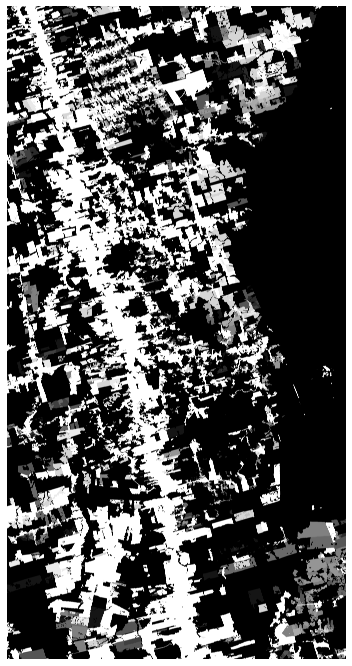

In [7]:
if type(dataset) == PADeforestationTime:

        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(image_stack[...,0], cmap = plt.cm.gray)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_deforestationYearDistance.png',
                dpi = 150, bbox_inches = 'tight')


In [8]:

if type(dataset) == PADeforestationTime:

        current_deforestation = label_mask.copy()
        current_deforestation[current_deforestation == 2] = 0
        in_year_distance = image_stack[...,0].copy()
        in_year_distance[
                in_year_distance>0] = 1
        in_year_distance = in_year_distance.astype(np.int8)

        current_deforestation_in_year_disance = current_deforestation.copy()
        current_deforestation_in_year_disance[in_year_distance == 0] = 0
        

In [9]:
if type(dataset) == PADeforestationTime:

	ic(np.unique(current_deforestation_in_year_disance, return_counts=True))

ic| np.unique(current_deforestation_in_year_disance, return_counts=True): (array([0, 1], dtype=uint8), array([163169183,         7], dtype=int64))


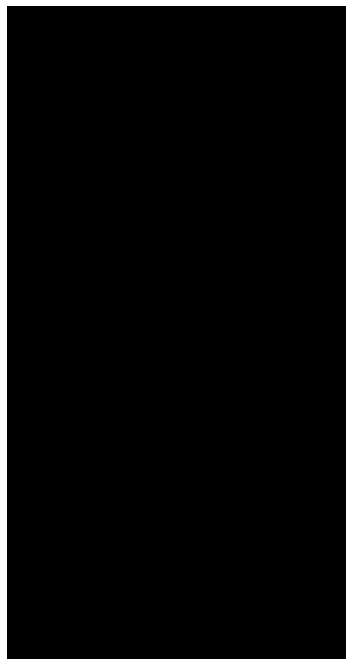

In [10]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(current_deforestation_in_year_disance, cmap = plt.cm.gray)


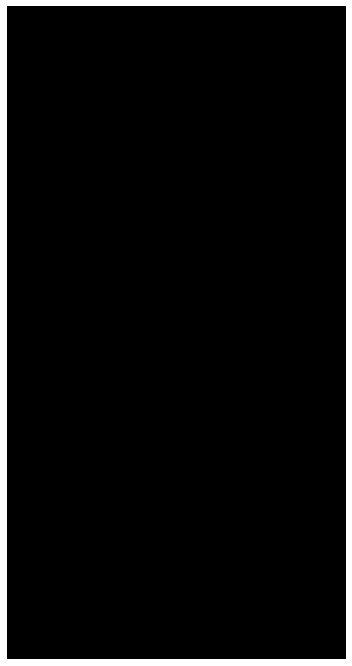

In [11]:

current_deforestation = label_mask.copy()
current_deforestation[current_deforestation == 2] = 0
past_deforestation = label_mask.copy()
past_deforestation[past_deforestation == 1] = 0
past_deforestation[past_deforestation == 2] = 1

current_deforestation[past_deforestation != 1] = 0
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(current_deforestation, cmap = plt.cm.gray)
# plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_deforestationYearDistance.png',
#         dpi = 150, bbox_inches = 'tight')


In [12]:
plot_distance_map = False

In [13]:
label_past_deforestation = label_mask.copy()
label_past_deforestation[label_past_deforestation == 1] = 0
label_past_deforestation[label_past_deforestation == 2] = 1
if plot_distance_map == True:
        distance_map = dataset.createDistMap(label_past_deforestation).astype(np.float32)
        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(distance_map)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_distanceMapPastDeforestation.png',
                dpi = 150, bbox_inches = 'tight')


In [14]:
if plot_distance_map == True:
        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(label_past_deforestation, cmap = plt.cm.gray)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_PastDeforestation.png',
                dpi = 150, bbox_inches = 'tight')

In [15]:
if plot_distance_map == True:
	ic(distance_map.shape, distance_map.dtype)
	np.save(dataset.paths.distance_map_past_deforestation, distance_map)

In [16]:
if plot_distance_map == True:
	ic(np.min(distance_map), np.average(distance_map), np.max(distance_map))

In [17]:
if plot_distance_map == True:
	deforestation_past_years = load_tiff_image(dataset.paths.deforestation_past_years)
	ic(np.unique(deforestation_past_years))


In [18]:

if plot_distance_map == True:
	deforestation_2018 = deforestation_past_years.copy()
	deforestation_2018[deforestation_2018 != 2018] = 0
	deforestation_2018[deforestation_2018 == 2018] = 1

	distance_map_2018 = dataset.createDistMap(deforestation_2018).astype(np.float32)
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(distance_map_2018)
	plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_distanceMapDeforestation2018.png',
			dpi = 150, bbox_inches = 'tight')

	np.save(dataset.paths.distance_map_past_deforestation_2018, distance_map_2018)

In [19]:
if plot_distance_map == True:
        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(deforestation_2018, cmap = plt.cm.gray)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_Deforestation2018.png',
                dpi = 150, bbox_inches = 'tight')

In [20]:

if plot_distance_map == True:
        deforestation_2017 = deforestation_past_years.copy()
        deforestation_2017[deforestation_2017 != 2017] = 0
        deforestation_2017[deforestation_2017 == 2017] = 1

        distance_map_2017 = dataset.createDistMap(deforestation_2017).astype(np.float32)
        plt.figure(figsize = (12,12))
        plt.imshow(distance_map_2017)
        plt.axis('off')
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_distanceMapDeforestation2017.png',
                dpi = 150, bbox_inches = 'tight')
        np.save(dataset.paths.distance_map_past_deforestation_2017, distance_map_2017)


In [21]:
if plot_distance_map == True:
        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(deforestation_2017, cmap = plt.cm.gray)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_Deforestation2017.png',
                dpi = 150, bbox_inches = 'tight')

In [22]:

if plot_distance_map == True:
	deforestation_2016 = deforestation_past_years.copy()
	deforestation_2016[deforestation_2016 != 2016] = 0
	deforestation_2016[deforestation_2016 == 2016] = 1

	distance_map_2016 = dataset.createDistMap(deforestation_2016).astype(np.float32)
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(distance_map_2016)
	plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_distanceMapDeforestation2016.png',
			dpi = 150, bbox_inches = 'tight')

	np.save(dataset.paths.distance_map_past_deforestation_2016, distance_map_2016)


In [23]:
if plot_distance_map == True:
        plt.figure(figsize = (12,12))
        plt.axis('off')
        plt.imshow(deforestation_2016, cmap = plt.cm.gray)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_Deforestation2016.png',
                dpi = 150, bbox_inches = 'tight')

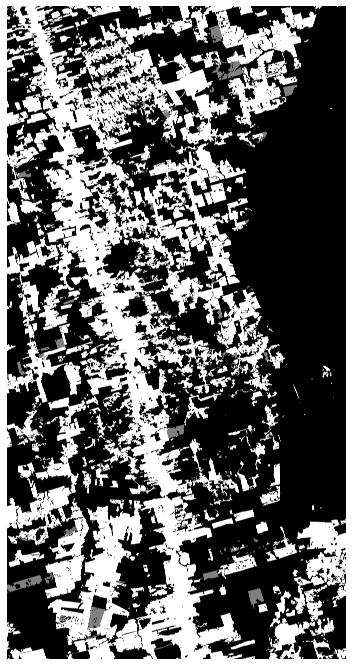

In [6]:
if type(dataset) == PAMultipleDates:
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(label_mask[...,0], cmap=plt.cm.gray)
	# plt.savefig('output/figures/' + dataset.__class__.__name__ + 'check_LabelMask.png',
	# 		dpi = 150, bbox_inches = 'tight')
			

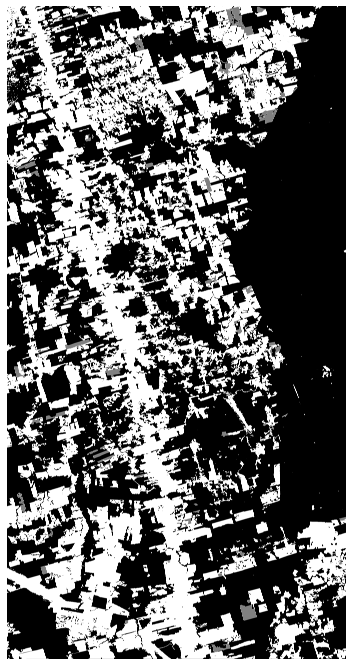

In [6]:
if type(dataset) == PAMultipleDates:
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(label_mask[...,1], cmap=plt.cm.gray)

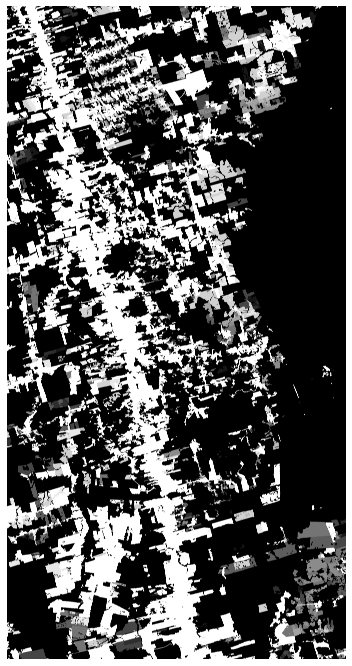

In [7]:
if type(dataset) == PAMultipleDates:
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(image_stack[...,0], cmap=plt.cm.gray)

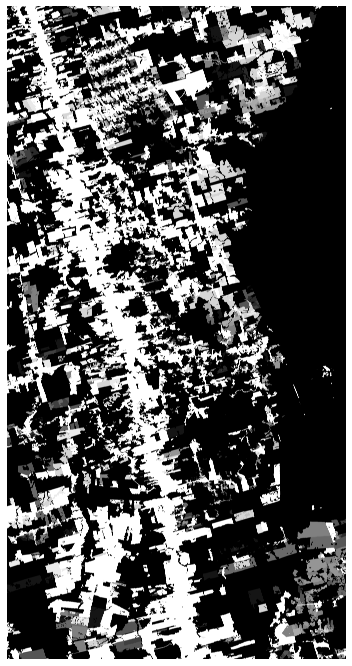

In [8]:
if type(dataset) == PAMultipleDates:
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(image_stack[...,1], cmap=plt.cm.gray)

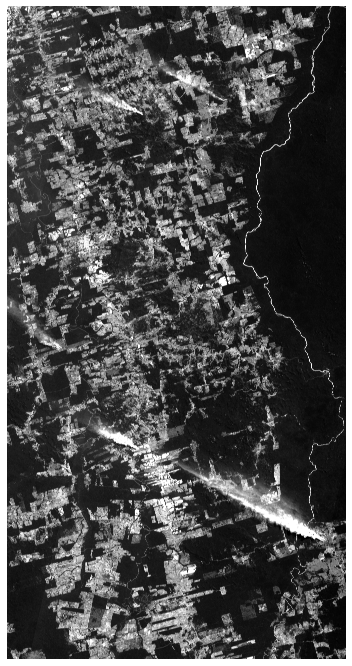

In [11]:
if type(dataset) == PAMultipleDates:
	plt.figure(figsize = (12,12))
	plt.axis('off')
	plt.imshow(image_stack[...,22], cmap=plt.cm.gray)